In [1]:
import os
import sys
import cv2
from PIL import Image

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


plt.style.use('classic')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [3]:
data_dir = 'NEWDATASET2/TRAIN/'

In [4]:
SIZE = 224
dataset = []
label = []

In [5]:
# Traverse through the batik directory directly
for batik_type in os.listdir(os.path.join(data_dir, 'batik')):
    # Check if it's a directory
    if os.path.isdir(os.path.join(data_dir, 'batik', batik_type)):
        # Inside each batik type directory
        for image_name in os.listdir(os.path.join(data_dir, 'batik', batik_type)):
            print(image_name)
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image = cv2.imread(os.path.join(data_dir, 'batik', batik_type, image_name))
                if image is not None:
                    resized_image = cv2.resize(image, (SIZE, SIZE))
                    dataset.append(resized_image)
                    label.append(1)  # Assuming 1 represents the label for batik images
print(len(dataset))

0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
4.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
5.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
6.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
7.jpg
8.jpg
9.jpg
0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
4.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
5.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
6.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
7.jpg
8.jpg
9.jpg
0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg


In [6]:
# Traverse through the batik directory directly
tidakbatik = os.listdir(os.path.join(data_dir, 'tidak_batik'))
for i, image_name in enumerate(tidakbatik):
      if image_name.endswith('.jpg'):
        image = cv2.imread(os.path.join(data_dir, 'tidak_batik',image_name))
        if image is not None:
          resized_image = cv2.resize(image, (SIZE, SIZE))
          dataset.append(resized_image)
          label.append(0)


In [7]:
dataset = np.array(dataset)
label = np.array(label)
print(dataset)
print(label)
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 0)

[[[[133 160 164]
   [157 179 185]
   [148 160 170]
   ...
   [ 79 112 127]
   [ 41  61  78]
   [ 29  45  61]]

  [[109 135 141]
   [139 163 169]
   [133 147 159]
   ...
   [ 78 111 126]
   [ 43  64  79]
   [ 30  46  62]]

  [[107 135 142]
   [111 136 146]
   [105 124 139]
   ...
   [ 70 103 118]
   [ 51  72  87]
   [ 38  55  68]]

  ...

  [[132 139 166]
   [135 142 167]
   [ 92  99 126]
   ...
   [ 66 104 128]
   [ 53  99 130]
   [ 49  97 131]]

  [[ 94 104 128]
   [151 162 184]
   [112 122 146]
   ...
   [ 63 105 134]
   [ 57 104 136]
   [ 49  97 133]]

  [[ 71  84 106]
   [133 146 168]
   [127 138 160]
   ...
   [ 62 108 139]
   [ 61 107 141]
   [ 57 105 141]]]


 [[[212 220 233]
   [212 220 233]
   [213 221 234]
   ...
   [ 72 139 194]
   [ 83 152 209]
   [ 85 155 214]]

  [[212 220 233]
   [212 220 233]
   [213 221 234]
   ...
   [ 75 141 194]
   [ 84 153 210]
   [ 85 155 214]]

  [[213 221 234]
   [213 221 234]
   [214 222 235]
   ...
   [ 87 151 205]
   [ 97 164 221]
   [100 169

In [8]:
from keras.utils import normalize

X_train = normalize(X_train, axis = 1)
X_test = normalize(X_test, axis = 1)
print(X_train)
print(X_test)

[[[[0.05526395 0.06198255 0.05819425]
   [0.0776839  0.08346664 0.06836911]
   [0.07763833 0.09719549 0.07011853]
   ...
   [0.08093916 0.10410569 0.03989717]
   [0.1251582  0.13506323 0.05477828]
   [0.13110927 0.1246846  0.05866885]]

  [[0.0548288  0.06302137 0.0587356 ]
   [0.07336812 0.08153678 0.06773898]
   [0.0601697  0.08109943 0.06275448]
   ...
   [0.07708492 0.09988519 0.04123825]
   [0.12188609 0.13506323 0.05712592]
   [0.12619267 0.12390042 0.05947808]]

  [[0.0548288  0.06683035 0.06117163]
   [0.07953351 0.09070364 0.07372522]
   [0.06081669 0.08357574 0.06659659]
   ...
   [0.07323067 0.09707152 0.04559677]
   [0.11288779 0.13251487 0.06064738]
   [0.11390118 0.11997952 0.06109653]]

  ...

  [[0.05526395 0.07791103 0.06902109]
   [0.06103735 0.08732637 0.07214989]
   [0.00388192 0.03281122 0.04290357]
   ...
   [0.02184073 0.03728109 0.03486812]
   [0.02863096 0.04926835 0.03286697]
   [0.07620726 0.09331741 0.05300428]]

  [[0.05526395 0.07929612 0.06902109]
   [0.0

In [9]:
INPUT_SHAPE = (SIZE,SIZE, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                

In [10]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history = model.fit(X_train,
                    y_train,
                    batch_size = 64,
                    verbose = 1,
                    epochs = 10,
                    validation_data = (X_test, y_test),
                    shuffle = False,
                    callbacks=my_callbacks,
                    )

Epoch 1/10


14/14 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.8982

C:\Program Files\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 157s 9s/step - loss: 0.2326 - accuracy: 0.8982 - val_loss: 0.1516 - val_accuracy: 0.9548
Epoch 2/10
14/14 [==============================] - 28s 2s/step - loss: 0.1373 - accuracy: 0.9491 - val_loss: 0.1065 - val_accuracy: 0.9548
Epoch 3/10
14/14 [==============================] - 14s 1s/step - loss: 0.1043 - accuracy: 0.9491 - val_loss: 0.0786 - val_accuracy: 0.9548
Epoch 4/10
14/14 [==============================] - 13s 938ms/step - loss: 0.0778 - accuracy: 0.9514 - val_loss: 0.0604 - val_accuracy: 0.9548
Epoch 5/10
14/14 [==============================] - 13s 928ms/step - loss: 0.0609 - accuracy: 0.9627 - val_loss: 0.0528 - val_accuracy: 0.9774
Epoch 6/10
14/14 [==============================] - 11s 804ms/step - loss: 0.0494 - accuracy: 0.9717 - val_loss: 0.0503 - val_accuracy: 0.9819
Epoch 7/10
14/14 [==============================] - 11s 812ms/step - loss: 0.0464 - accuracy: 0.9740 - val_loss: 0.0365 - val_accuracy: 0.9819
Epoch 8/10
14/14 [

In [11]:
model.save('budaya_model.h5')

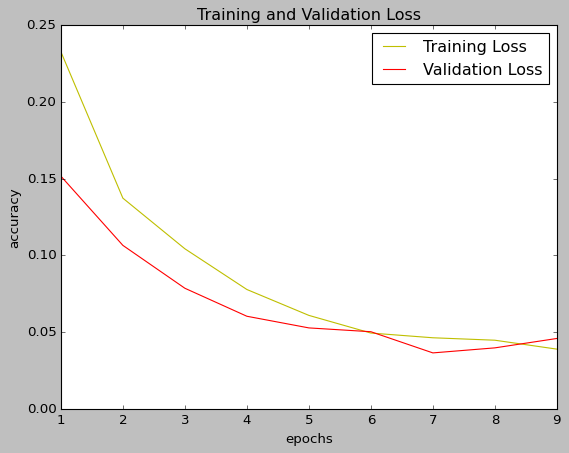

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 31ms/step
The prediction for this image is:  [[0.32146478]]
The actual label for this image is:  0


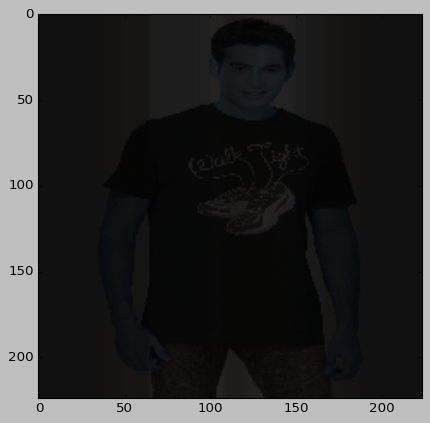

In [88]:
import random
n = 56
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img,axis = 0)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])
#1 is batik
#0 is tidak_batik

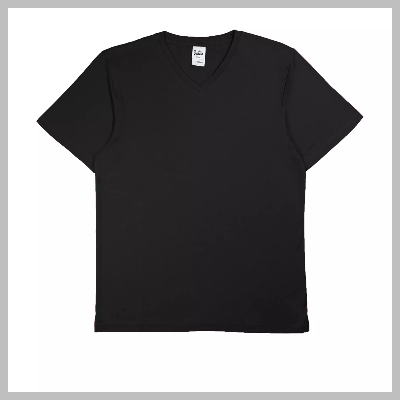

1/1 [==============================] - 0s 232ms/step
The prediction for this image is:  Batik
1/1 [==============================] - 0s 33ms/step
The prediction for this image is:  [[1.]]


In [94]:
# from PIL import Image
# import requests
# import matplotlib.pyplot as plt
# import numpy as np
# import io
# # Load the image from URL
# url = "https://dynamic.zacdn.com/G7lDR7nPwbRZTtwiYxvKMWkIzVE=/filters:quality(70):format(webp)/https://static-id.zacdn.com/p/jipclo-6987-4986823-4.jpg"
# response = requests.get(url)
# img = Image.open(io.BytesIO(response.content))

# plt.imshow(img)
# plt.axis('off')  # Hide axes
# plt.show()  # Display the image using matplotlib

# # Preprocess the image for prediction
# img = img.resize((SIZE, SIZE))  # Resize the image to match model input size
# # img = np.array(img)  # Convert PIL image to numpy array
# # img_normalized = img.astype(np.float32) / 255.0  # Normalize pixel values

# input_img = np.expand_dims(img, axis=0)

# # Make prediction using the model
# prediction = model.predict(input_img)
# predicted_label = "Batik" if prediction[0][0] > 0.5 else "Non-Batik"  # Assuming it's a binary classification task

# print("The prediction for this image is: ", predicted_label)
# print("The prediction for this image is: ", model.predict(input_img))
# # print("The actual label for this image is: ", y_test[n])
# # No y_test[n] available


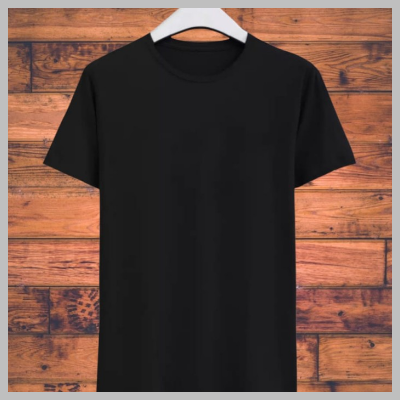

1/1 [==============================] - 0s 37ms/step
Predicted Label: batik
True Label: batik


In [75]:
# # Given: true_labels is a list of ground truth labels for your evaluation images
# true_labels = ['batik', 'tidak_batik', 'batik', ...]  # Replace with your actual ground truth labels

# img_path = "NEWDATASET2/EVALUATION/baju_2.jpg"
# img = Image.open(img_path)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

# SIZE = 224

# # Preprocess the image for prediction
# img = img.resize((SIZE, SIZE))  # Resize the image to match model input size
# img_array = np.array(img)  # Convert PIL image to numpy array
# img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
# img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# # Make a prediction
# prediction = model.predict(img_array)

# # Threshold the prediction
# threshold = 0.5  # Example threshold, adjust as needed
# predicted_label = 'batik' if prediction > threshold else 'tidak_batik'

# # Compare predicted label with true label
# print("Predicted Label:", predicted_label)
# print("True Label:", true_labels[0])  # Assuming the first image's true label is at index 0


In [77]:
# # Model Evaluation on Test Set
# _, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# # Predictions on Test Set
# predictions = model.predict(X_test)
# predicted_labels = ['batik' if pred > 0.5 else 'tidak_batik' for pred in predictions]

# # Show first few predictions
# for i in range(10):
#     print(f"Predicted label: {predicted_labels[i]}, True label: {'batik' if y_test[i] == 1 else 'tidak_batik'}")


7/7 [==============================] - 1s 106ms/step - loss: 0.0459 - accuracy: 0.9955
Test Accuracy: 99.55%
7/7 [==============================] - 1s 96ms/step
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
Predicted label: batik, True label: batik
